### Purpose

This notebook's purpose is to calculate the nudge impact of the distributions generated in the different experiments 

In [6]:
import numpy as np
import max_nudges
import matplotlib.pyplot as plt

### Settings where to find the distributions

The results for the ising model using Glauber dynammics

In [7]:
filepath = "/home/derkjan/Documents/academics_UVA/master_thesis_code/master_thesis/"

#settings for Ising using glauber dynamics
distributions_ising_glauber = "ising_distributions"
marginal_format_ising_glauber = "{}/marginal{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.npy"
conditional_format_ising_glauber = "{}/conditional{}_neighbors{}_network_size{}_network_degree{}_temp{:.2f}.npy"
number_of_distributions_ising = 30
max_number_of_neighbors_ising = 9
number_of_nodes_ising = 100
network_degree_ising = 2
temperature_ising = 2.5


#settings for SIRS models
distributions_SIRS = "SIRS_distributions"
marginal_format_SIRS = "{}/marginal{}_neighbors{}_network_size{}_network_degree{}_mode_{}.npy"
conditional_format_SIRS = "{}/conditional{}_neighbors{}_network_size{}_network_degree{}_mode_{}.npy"
number_of_distributions_SIRS = 100
max_number_of_neighbors_SIRS = 7
number_of_nodes_SIRS = 100
network_degree_SIRS = 2
mode_SIRS = "powerlaw"


In [8]:
distributions_folder = filepath + distributions_SIRS
filename_marginal_format = marginal_format_SIRS
filename_conditional_format = conditional_format_SIRS
number_of_distributions = number_of_distributions_SIRS
max_number_of_neighbors = max_number_of_neighbors_SIRS
number_of_nodes = number_of_nodes_SIRS
network_degree = network_degree_SIRS
temperature = temperature_ising
mode = mode_SIRS
nudge_size = 0.01


In [10]:
class Distribution():
    def __init__(self, marginal, conditional):
        self.marginal = marginal
        self.conditional = conditional

class DistributionFactory():
    def __init__(self, filepath):
        self.filepath = filepath
        
    def get_distribution(self, marginal_file, conditional_file):
        try:
            marginal = np.load(self.filepath + filename_marginal)
            conditional = np.load(self.filepath + filename_conditional)
            return Distribution(marginal, conditional) 
        except IOError:
            print("file not found")
            return None
        
class DistributionFactoryNetwork(DistributionFactory):
    def __init__(self, filepath, number_of_nodes, network_degree, number_of_neighbors):
        pass
        
class DistributionFactoryIsing(DistributionFactoryNetwork):
    def __init__(self, filepath, number_of_nodes, network_degree, number_of_neighbors, temperature):
        super(filepath, number_of_nodes, network_degree, number_of_neighbors)
        self.temperature = temperature
        self.fileformat_marginal = ""
        self.fileformat_conditional = ""

        
    def load_ising_distribution(self, fileformat_marginal, fileformat_conditional):
        pass
        
    def save_ising_distribution():
        pass
    
    def some_function():
        distributions = []
        for count in range(number_of_distributions):
            neighbors_to_distributions = {}
            for number_of_neighbors in range(1, max_number_of_neighbors):
                filename_marginal = filename_marginal_format.format(
                    distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, mode
                )
                filename_conditional = filename_conditional_format.format(
                    distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, mode
                )
                try:
                    marginal = np.load(filename_marginal)
                    conditional = np.load(filename_conditional)
                    neighbors_to_distributions[number_of_neighbors] = {
                        "marginal": marginal,
                        "conditional": conditional
                    }
                except IOError:
                    print("file not found distribution number {}, number of neighbors {}".format(
                        count, number_of_neighbors
                    ))
            distributions.append(neighbors_to_distributions)
    


In [12]:
distributions = []
for count in range(number_of_distributions):
    neighbors_to_distributions = {}
    for number_of_neighbors in range(1, max_number_of_neighbors):
        filename_marginal = filename_marginal_format.format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, mode
        )
        filename_conditional = filename_conditional_format.format(
            distributions_folder, count, number_of_neighbors, number_of_nodes, network_degree, mode
        )
        try:
            marginal = np.load(filename_marginal)
            conditional = np.load(filename_conditional)
            neighbors_to_distributions[number_of_neighbors] = {
                "marginal": marginal,
                "conditional": conditional
            }
        except IOError:
            print("file not found distribution number {}, number of neighbors {}".format(
                count, number_of_neighbors
            ))
    distributions.append(neighbors_to_distributions)


file not found distribution number 13, number of neighbors 4
file not found distribution number 13, number of neighbors 6
file not found distribution number 20, number of neighbors 6
file not found distribution number 24, number of neighbors 6
file not found distribution number 25, number of neighbors 6
file not found distribution number 33, number of neighbors 6
file not found distribution number 38, number of neighbors 6
file not found distribution number 43, number of neighbors 2
file not found distribution number 43, number of neighbors 3
file not found distribution number 43, number of neighbors 4
file not found distribution number 43, number of neighbors 5
file not found distribution number 43, number of neighbors 6
file not found distribution number 48, number of neighbors 6
file not found distribution number 56, number of neighbors 6
file not found distribution number 58, number of neighbors 6
file not found distribution number 61, number of neighbors 2
file not found distribut

In [13]:
number_of_neighbors_to_distributions = {}
for distribution in distributions:
    for number_of_neighbors, dist_dict in distribution.items():
        if number_of_neighbors in number_of_neighbors_to_distributions:
            number_of_neighbors_to_distributions[number_of_neighbors].append(dist_dict)
        else:
            number_of_neighbors_to_distributions[number_of_neighbors] = [dist_dict]
        
#print(number_of_neighbors_to_distributions[2])
        

### parameters nudge optimization

In [14]:
class NudgeImpact():
    def __init__(self, marginal, conditional, nudge_size):
        self.marginal = marginal
        self.conditional = conditional
        self.nudge_size = nudge_size
        
    def get_max_individual_impact(self):
        try:
            individual_impact = max_nudges.max_nudge_impact(
                self.marginal, self.conditional, self.nudge_size, 
                "individual", None
            )
            return individual_impact
        except:
            print("some problem occured")
            return None
        
    def get_max_global_impact(self):
        return max_nudges.max_nudge_impact(
            self.marginal, self.conditional, self.nudge_size, 
            "global", None
        ) 
    
    def get_max_synergistic_impact(self, evolutionary_parameters):
        return max_nudges.max_nudge_impact(
            self.marginal, self.conditional, self.nudge_size, 
            "synergistic", evolutionary_parameters
        )
    

        

In [27]:
nudge_size = 0.01
evolutionary_parameters = {
    "number_of_generations": 150,
    "population_size": 10,
    "number_of_children": 20,
    "generational": False,
    "mutation_size": nudge_size / 10,
    "parent_selection_mode": "rank_exponential",
    "start_mutation_size": nudge_size / 20,
    "change_mutation_size": nudge_size / (25 * 10),
    "mutations_per_update_step": 1
}


### Optimize synergistic nudge impact

In [28]:
nudge_type_to_impacts = {"individual":{}, "global":{}, "synergistic": {}}
number_of_neighbors_to_impacts = {}
for count, distributions in number_of_neighbors_to_distributions.items():
    print(count)
    individual_impacts = []
    synergistic_impacts = []
    global_impacts = []
    for count_dist, dist_dict in enumerate(distributions):
        print(count_dist)
        nudge_impact = NudgeImpact(
            dist_dict["marginal"], dist_dict["conditional"], nudge_size
        )
        
        #individual impact
        individual_impact = nudge_impact.get_max_individual_impact()
        if individual_impact is not None:
            individual_impacts.append(individual_impact)

        #global impact
        global_impacts.append(nudge_impact.get_max_global_impact())        
        
        #synergistic impacts
        if count >= 2:
            synergistic_impact = max_nudges.max_nudge_impact(
                dist_dict["marginal"], dist_dict["conditional"], nudge_size, 
                "synergistic", evolutionary_parameters
            ) 
            synergistic_impacts.append(synergistic_impact)

    
    nudge_type_to_impacts["individual"][count] = individual_impacts
    nudge_type_to_impacts["synergistic"][count] = synergistic_impacts
    nudge_type_to_impacts["global"][count] = global_impacts
    


#max_nudges.max_nudge_impact(
#    dist_dict["marginal"], dist_dict["conditional"], nudge_size, 
#    "synergistic", evolutionary_parameters
#) 


1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
WARNING size of nudge 0.00999728427539
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
3
0
1
2
3
4
WARNING size of nudge 0.00998638489589
5
6
WARNING size of nudge 0.00994987551924
7
8
9
10
11
12
WARNING size of nudge 0.00999619170831
13
WARNING size of nudge 0.00863035299165
14
15
16
17
18
19
20
21
WARNING size of nudge 0.00999878724993
22
23
WARNING size of nudge 0.00995691706388
24
25
26
27
28
WARNING size of nudge 0.00991379705455
29
30
WARNING size of nudge 0.0

In [29]:
nudge_type_to_impacts["synergistic"].pop(1)
print({k:np.mean(v) for k,v in nudge_type_to_impacts["individual"].items()})
print({k:np.mean(v) for k,v in nudge_type_to_impacts["synergistic"].items()})
print({k:np.mean(v) for k,v in nudge_type_to_impacts["global"].items()})

{1: 0.0081956691471472849, 2: 0.007136892295960295, 3: 0.0063479017345942409, 4: 0.0057492476357984936, 5: 0.0052232571839371201, 6: 0.0048826800604625884}
{2: 0.0030567559960168571, 3: 0.0045489625667197598, 4: 0.004475835535976351, 5: 0.0038428946830996956, 6: 0.00278180263167719}
{1: 0.0081956691471472849, 2: 0.0091112812055286138, 3: 0.0095630968342112627, 4: 0.0098907245626483047, 5: 0.0099707338578404799, 6: 0.0099911781015274495}


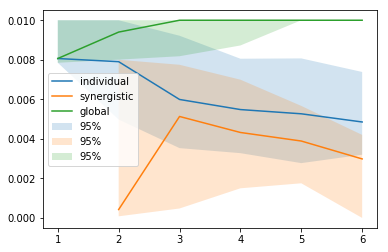

In [30]:
# nudge_types = ["individual", "synergistic", "global"]
nudge_types = ["individual", "synergistic", "global"]
for nudge_type in nudge_types:
    #add confidence intervals based on percentiles
    lower_bound, median, upper_bound = [], [], []
    for variable_number, impacts in nudge_type_to_impacts[nudge_type].items():
        lower_bound.append(np.percentile(impacts, 2.5))
        median.append(np.median(impacts)) 
        upper_bound.append(np.percentile(impacts, 97.5))
        
    plot_range = [i for i in list(nudge_type_to_impacts[nudge_type].keys())]
    plt.plot(plot_range, median, label=nudge_type)
    plt.fill_between(plot_range, lower_bound, upper_bound, 
                     label='{}'.format("95%"), alpha=0.2)
    
plt.legend()    
plt.show()

In [12]:
import time
from multiprocessing import Pool

def stupid_function(optimizer):
    count = 0
    for  i in range(optimizer.length):
        count += 1
        
    return count

class Optimizer():
    def __init__(self, length):
        self.length = length

start_sequential = time.time()
results = map(stupid_function, [Optimizer(5 * 10**5) for _ in range(1000)]) 
end_sequential = time.time()
print("baseline {}".format(end_sequential-start_sequential))
pool = Pool(2)
start_parallel = time.time()
results = pool.map(stupid_function, [Optimizer(5 * 10**5) for _ in range(1000)])
end_parallel = time.time()
print(end_parallel-start_parallel)

baseline 21.7054929733
12.0173921585
